In [66]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [68]:
def read_table(path):
    """Reads table and drops irrelevant columns and rows.
    Returns an analysis ready DataFrame"""
    df = pd.read_table('EMG/'+path)
    df.drop(columns=['time'],inplace=True)
    df = df[df['class']!=0]
    df = df[df['class']!=7]
    return df

In [69]:
df = read_table('01/2_1.txt')
for n in range(2,37):
    if(n<10):
        path = f'0{n}/2_{n}.txt'
        df = pd.concat([df, read_table(path)])
    else:
        path = f'{n}/2_{n}.txt'
        df = pd.concat([df, read_table(path)])

In [70]:
df

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
816,-0.00003,-0.00004,-0.00006,-0.00006,-0.00004,-0.00002,-0.00001,-0.00002,1
817,-0.00003,-0.00004,-0.00006,-0.00006,-0.00004,-0.00002,-0.00001,-0.00002,1
818,-0.00003,-0.00004,-0.00006,-0.00006,-0.00004,-0.00002,-0.00001,-0.00002,1
819,-0.00003,-0.00004,-0.00006,-0.00006,-0.00004,-0.00002,-0.00001,-0.00002,1
820,-0.00003,-0.00004,-0.00006,-0.00006,-0.00004,-0.00002,-0.00001,-0.00002,1
...,...,...,...,...,...,...,...,...,...
48664,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6
48665,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6
48666,0.00009,0.00001,0.00003,0.00001,-0.00003,-0.00008,0.00004,0.00000,6
48667,0.00014,0.00003,-0.00001,0.00001,-0.00012,0.00006,-0.00007,-0.00013,6


In [71]:
df.reset_index(drop=True,inplace=True)

In [72]:
df['class'].value_counts()

class
4    127509
6    127490
5    125881
3    124058
2    121604
1    121539
Name: count, dtype: int64

In [73]:
#maps class values so that pandas doesn't complain when we try to use them
mapping = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6}
df['class'] = df['class'].map(mapping)

In [74]:
df['class'].value_counts()

class
3    127509
5    127490
4    125881
2    124058
1    121604
0    121539
Name: count, dtype: int64

In [75]:
X = df.drop(columns=['class'])
y = df['class']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [77]:
X_train

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
33022,0.00004,0.00002,0.00027,0.00043,0.00020,-0.00007,0.00000,0.00003
745987,0.00019,0.00011,-0.00001,-0.00003,0.00018,-0.00001,0.00000,0.00003
580197,-0.00006,-0.00001,0.00001,0.00003,0.00005,-0.00018,0.00000,0.00031
655656,-0.00001,-0.00002,-0.00006,-0.00004,0.00001,-0.00002,0.00000,-0.00001
530810,0.00014,-0.00008,-0.00004,0.00003,-0.00015,-0.00018,0.00018,0.00039
...,...,...,...,...,...,...,...,...
682249,-0.00001,0.00002,0.00011,-0.00056,-0.00044,0.00004,0.00004,0.00011
145897,0.00008,-0.00002,0.00005,0.00002,0.00036,0.00069,0.00074,0.00015
133204,0.00006,0.00010,0.00019,0.00010,0.00003,0.00006,0.00024,0.00044
125435,-0.00002,-0.00013,-0.00032,-0.00063,-0.00119,-0.00032,-0.00006,-0.00001


In [78]:
def scaler(df):
    """Normalizes the data, returns a DataFrame with the new scaled numbers"""
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(scaled, columns=df.columns)
    return df_scaled

In [79]:
X_train = scaler(X_train)
X_test = scaler(X_test)

In [80]:
X_train

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.253917,0.215996,2.079430,1.648580,0.683505,-0.234044,0.056349,0.199795
1,1.043437,0.872183,-0.003607,-0.077372,0.621382,0.005060,0.056349,0.199795
2,-0.272429,-0.002732,0.145181,0.147752,0.217577,-0.672402,0.056349,1.576065
3,-0.009256,-0.075642,-0.375578,-0.114893,0.093330,-0.034791,0.056349,0.003185
4,0.780263,-0.513100,-0.226790,0.147752,-0.403660,-0.672402,1.061527,1.969285
...,...,...,...,...,...,...,...,...
598459,-0.009256,0.215996,0.889123,-2.065969,-1.304455,0.204314,0.279722,0.593015
598460,0.464456,-0.075642,0.442758,0.110231,1.180495,2.794612,4.188748,0.789625
598461,0.359186,0.799273,1.484277,0.410397,0.155454,0.284015,1.396586,2.215048
598462,-0.061891,-0.877648,-2.309827,-2.328614,-3.634095,-1.230313,-0.278711,0.003185


In [81]:
model = Sequential()
model.add(Dense(10, input_dim=8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dense(16, input_dim=8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dense(32, input_dim=8, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(Dense(6,activation='softmax'))
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, mode='auto')
model.fit(X_train, y_train, epochs=20, batch_size=50, callbacks=[early_stopping])

Epoch 1/20


c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11970/11970 ━━━━━━━━━━━━━━━━━━━━ 13s 921us/step - accuracy: 0.5133 - loss: 1.3852
Epoch 2/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 10s 850us/step - accuracy: 0.5950 - loss: 1.1498
Epoch 3/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.5966 - loss: 1.1218
Epoch 4/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.5991 - loss: 1.1060
Epoch 5/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6025 - loss: 1.0923
Epoch 6/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6031 - loss: 1.0846
Epoch 7/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6028 - loss: 1.0785
Epoch 8/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6036 - loss: 1.0745
Epoch 9/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6041 - loss: 1.0697
Epoch 10/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.6049 - loss: 1.0663
Epoch 11/20
11970/11970 ━━━━━━━━━━━━━━━━━━━━ 11s 880us/step - accuracy: 0.6059 - loss: 1.0614
Ep

In [84]:
model.evaluate(X_test,y_test)

4676/4676 ━━━━━━━━━━━━━━━━━━━━ 3s 588us/step - accuracy: 0.6104 - loss: 1.0406


[1.0396451950073242, 0.6107327342033386]

4676/4676 ━━━━━━━━━━━━━━━━━━━━ 3s 562us/step


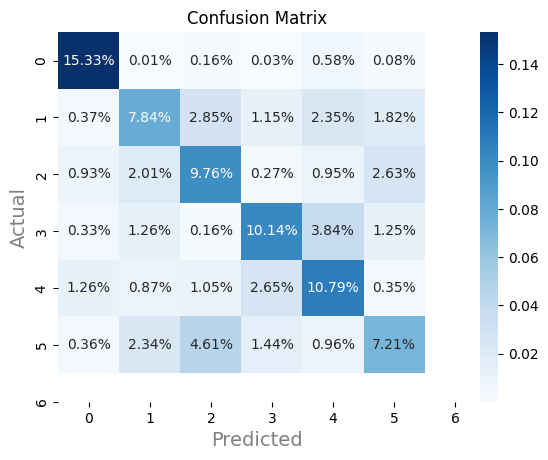

In [85]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)


cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, cmap='Blues', fmt='.2%', xticklabels=[f'0', '1', '2', '3', '4', '5', '6'], yticklabels=[f'0', '1', '2', '3', '4', '5', '6'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted', fontsize=14, color='grey')
plt.ylabel('Actual', fontsize=14, color='grey')
plt.show()